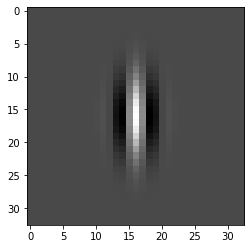

In [1]:
#Author ~ Matthew Peter Jones
#In this notebook i am going to apply Gabor filter and other feature extraction techniques to the data 
#This will feed the ML workflow, i.e random forest
import numpy as np
import cv2
import matplotlib.pyplot as plt
#this is just a demonstration of a gabor kernel that only passes vertical lines
ksize = 33
sigma = 2
theta = 1*np.pi/1
lamda = 1*np.pi/10
gamma = 0.5
phi = 0 

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype = cv2.CV_32F)
plt.imshow(kernel.astype('float32'), cmap = 'gray')
#print(kernel.astype('float32'))


In [2]:
#now we will load the image to be filtered
img = cv2.imread('E:/paper_2/Registration_Volumes/cropped_TiffSaver-tomo_C0.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#execute filter
filtered = cv2.filter2D(img, cv2.CV_8UC3, kernel)
#filtered_inv = cv2.filter2D(img, cv2.CV_8UC3, kernel*-1)

#visualise
cv2.imshow('Original', img)
cv2.imshow('Filtered', filtered)
#cv2.imshow('Filtered Inverse', filtered_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import pandas as pd
#okay, mow that we demonstrated a gabor kernel let's make a filter bank of different unique filters
df = pd.DataFrame()
#we want to store these images as single dimenions in the data frame
img2 = img.reshape(-1)
df['original_pixels'] = img2


In [11]:
#so that data frame is working as expected, time to parameterise the gabor filter args
#using nested loops
label_num = 1
for theta in np.arange(0, np.pi*4, np.pi/4):
    for sigma in np.arange(0, 6, 0.5):
        for lamda in np.arange(np.pi/20, np.pi, np.pi/20):
            for gamma in np.arange(0, 0.5, 0.05):
                kernel = cv2.getGaborKernel((33, 33), sigma, theta, lamda, gamma, 0, ktype = cv2.CV_32F)
                filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_df = filtered_img.reshape(-1)
                gabor_label = 'Gabor' + str(label_num)
                df[gabor_label] = filtered_df
                label_num += 1

#now we will add some other important filters for feature extraction to the data frame
canny_edges = cv2.Canny(img, 100, 200)
canny_edges_1 = canny_edges.reshape(-1)
df['Canny_edge'] = canny_edges_1

from skimage.filters import roberts, sobel, scharr, prewitt

roberts_edges = roberts(img)
roberts_edges_1 = roberts_edges.reshape(-1)
df['Roberts_edge'] = roberts_edges_1

sobel_edges = sobel(img)
sobel_edges_1 = sobel_edges.reshape(-1)
df['Sobel_edge'] = sobel_edges_1

scharr_edges = scharr(img)
scharr_edges_1 = scharr_edges.reshape(-1)
df['Scharr_edge'] = scharr_edges_1

prewitt_edges = prewitt(img)
prewitt_edges_1 = prewitt_edges.reshape(-1)
df['Prewitt_edge'] = prewitt_edges_1

from scipy import ndimage as nd

gauss_img = nd.gaussian_filter(img, sigma=1)
gauss_img1 = gauss_img.reshape(-1)
df['Gaussian_s1'] = gauss_img1

gauss_img2 = nd.gaussian_filter(img, sigma=2)
gauss_img3 = gauss_img2.reshape(-1)
df['Gaussian_s2'] = gauss_img3

gauss_img4 = nd.gaussian_filter(img, sigma=4)
gauss_img5 = gauss_img4.reshape(-1)
df['Gaussian_s4'] = gauss_img5

gauss_img6 = nd.gaussian_filter(img, sigma=7)
gauss_img7 = gauss_img6.reshape(-1)
df['Gaussian_s7'] = gauss_img7

median_img = nd.median_filter(img, size=2)
median_img1 = median_img.reshape(-1)
df['Median_s2'] = median_img1

median_img2 = nd.median_filter(img, size=6)
median_img3 = median_img2.reshape(-1)
df['Median_s6'] = median_img3

#and finally the labelled and unlabelled images for the random forest
img_labels = cv2.imread('E:/paper_2/ml_workflow/img0a.labels.tif')
img_labels = cv2.cvtColor(img_labels, cv2.COLOR_BGR2GRAY)
img_labels_reshaped = img_labels.reshape(-1)
df['truth_pixels'] = img_labels_reshaped

imgb = cv2.imread('E:/paper_2/ml_workflow/img0b.tif')
imgb = cv2.cvtColor(imgb, cv2.COLOR_BGR2GRAY)
imgb_reshaped = imgb.reshape(-1)
df['original_pixels_b'] = imgb_reshaped

imgb_labels = cv2.imread('E:/paper_2/ml_workflow/img0b.labels.tif')
imgb_labels = cv2.cvtColor(imgb_labels, cv2.COLOR_BGR2GRAY)
imgb_labels_reshaped = imgb_labels.reshape(-1)
df['truth_pixels_b'] = imgb_labels_reshaped

imgc = cv2.imread('E:/paper_2/ml_workflow/img0c.tif')
imgc = cv2.cvtColor(imgc, cv2.COLOR_BGR2GRAY)
imgc_reshaped = imgc.reshape(-1)
df['original_pixels_c'] = imgc_reshaped

imgc_labels = cv2.imread('E:/paper_2/ml_workflow/img0c.labels.tif')
imgc_labels = cv2.cvtColor(imgc_labels, cv2.COLOR_BGR2GRAY)
imgc_labels_reshaped = imgc_labels.reshape(-1)
df['truth_pixels_c'] = imgc_labels_reshaped

print(df.head())
print(df.shape)           

   original_pixels  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0              109       0       0       0       0       0       0       0   
1              104       0       0       0       0       0       0       0   
2              113       0       0       0       0       0       0       0   
3              123       0       0       0       0       0       0       0   
4              111       0       0       0       0       0       0       0   

   Gabor8  Gabor9  ...  Gaussian_s2  Gaussian_s4  Gaussian_s7  Median_s2  \
0       0       0  ...          108          107          106        109   
1       0       0  ...          108          106          106        109   
2       0       0  ...          107          106          106        113   
3       0       0  ...          107          106          106        123   
4       0       0  ...          107          106          106        123   

   Median_s6  truth_pixels  original_pixels_b  truth_pixels_b  \
0        

In [12]:
df.to_pickle('E:/paper_2/dataframe.pkl')  # where to save it, usually as a .pkl
#Then we can load it back using: df = pd.read_pickle('file_name')
